In [37]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# reading the csv file
# converting it to a dataframe

df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [39]:
# getting the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


From the dataset, following observations can be done
1. total 14 columns are there
2. 2 Float values, 3 string values and 9 integer values
3. no null values are present in the dataset

In [40]:
# still checking any null values are there
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [41]:
# checking any null values are there in the dataset
df.duplicated().sum()

0

In [42]:
df.shape
# 10000 rows are there

(10000, 14)

In [43]:
# We Don't need RowNumber, Customer ID and Surname
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [44]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [45]:
df['Geography'].unique()
# there are three unique countries specified

array(['France', 'Spain', 'Germany'], dtype=object)

In [46]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [47]:
# only Geography and Gender are in object datatype

### Exploratory Data Analysis

<Axes: xlabel='Geography', ylabel='count'>

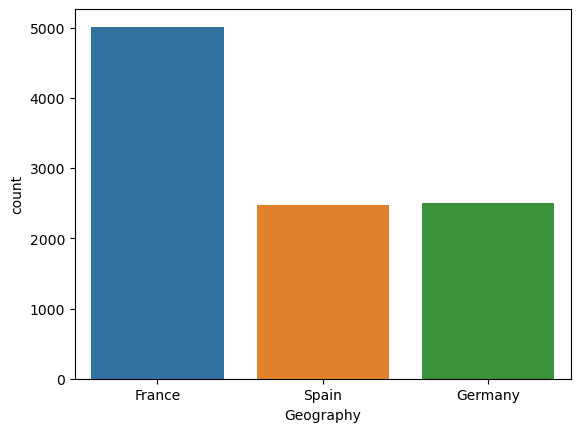

In [48]:
sns.countplot(df,x='Geography')
# from the plot
# France -> 5000 entries
# Spain -> 2500 entries
# Germany -> 2500 entries

Text(0.5, 1.0, 'Age Distribution')

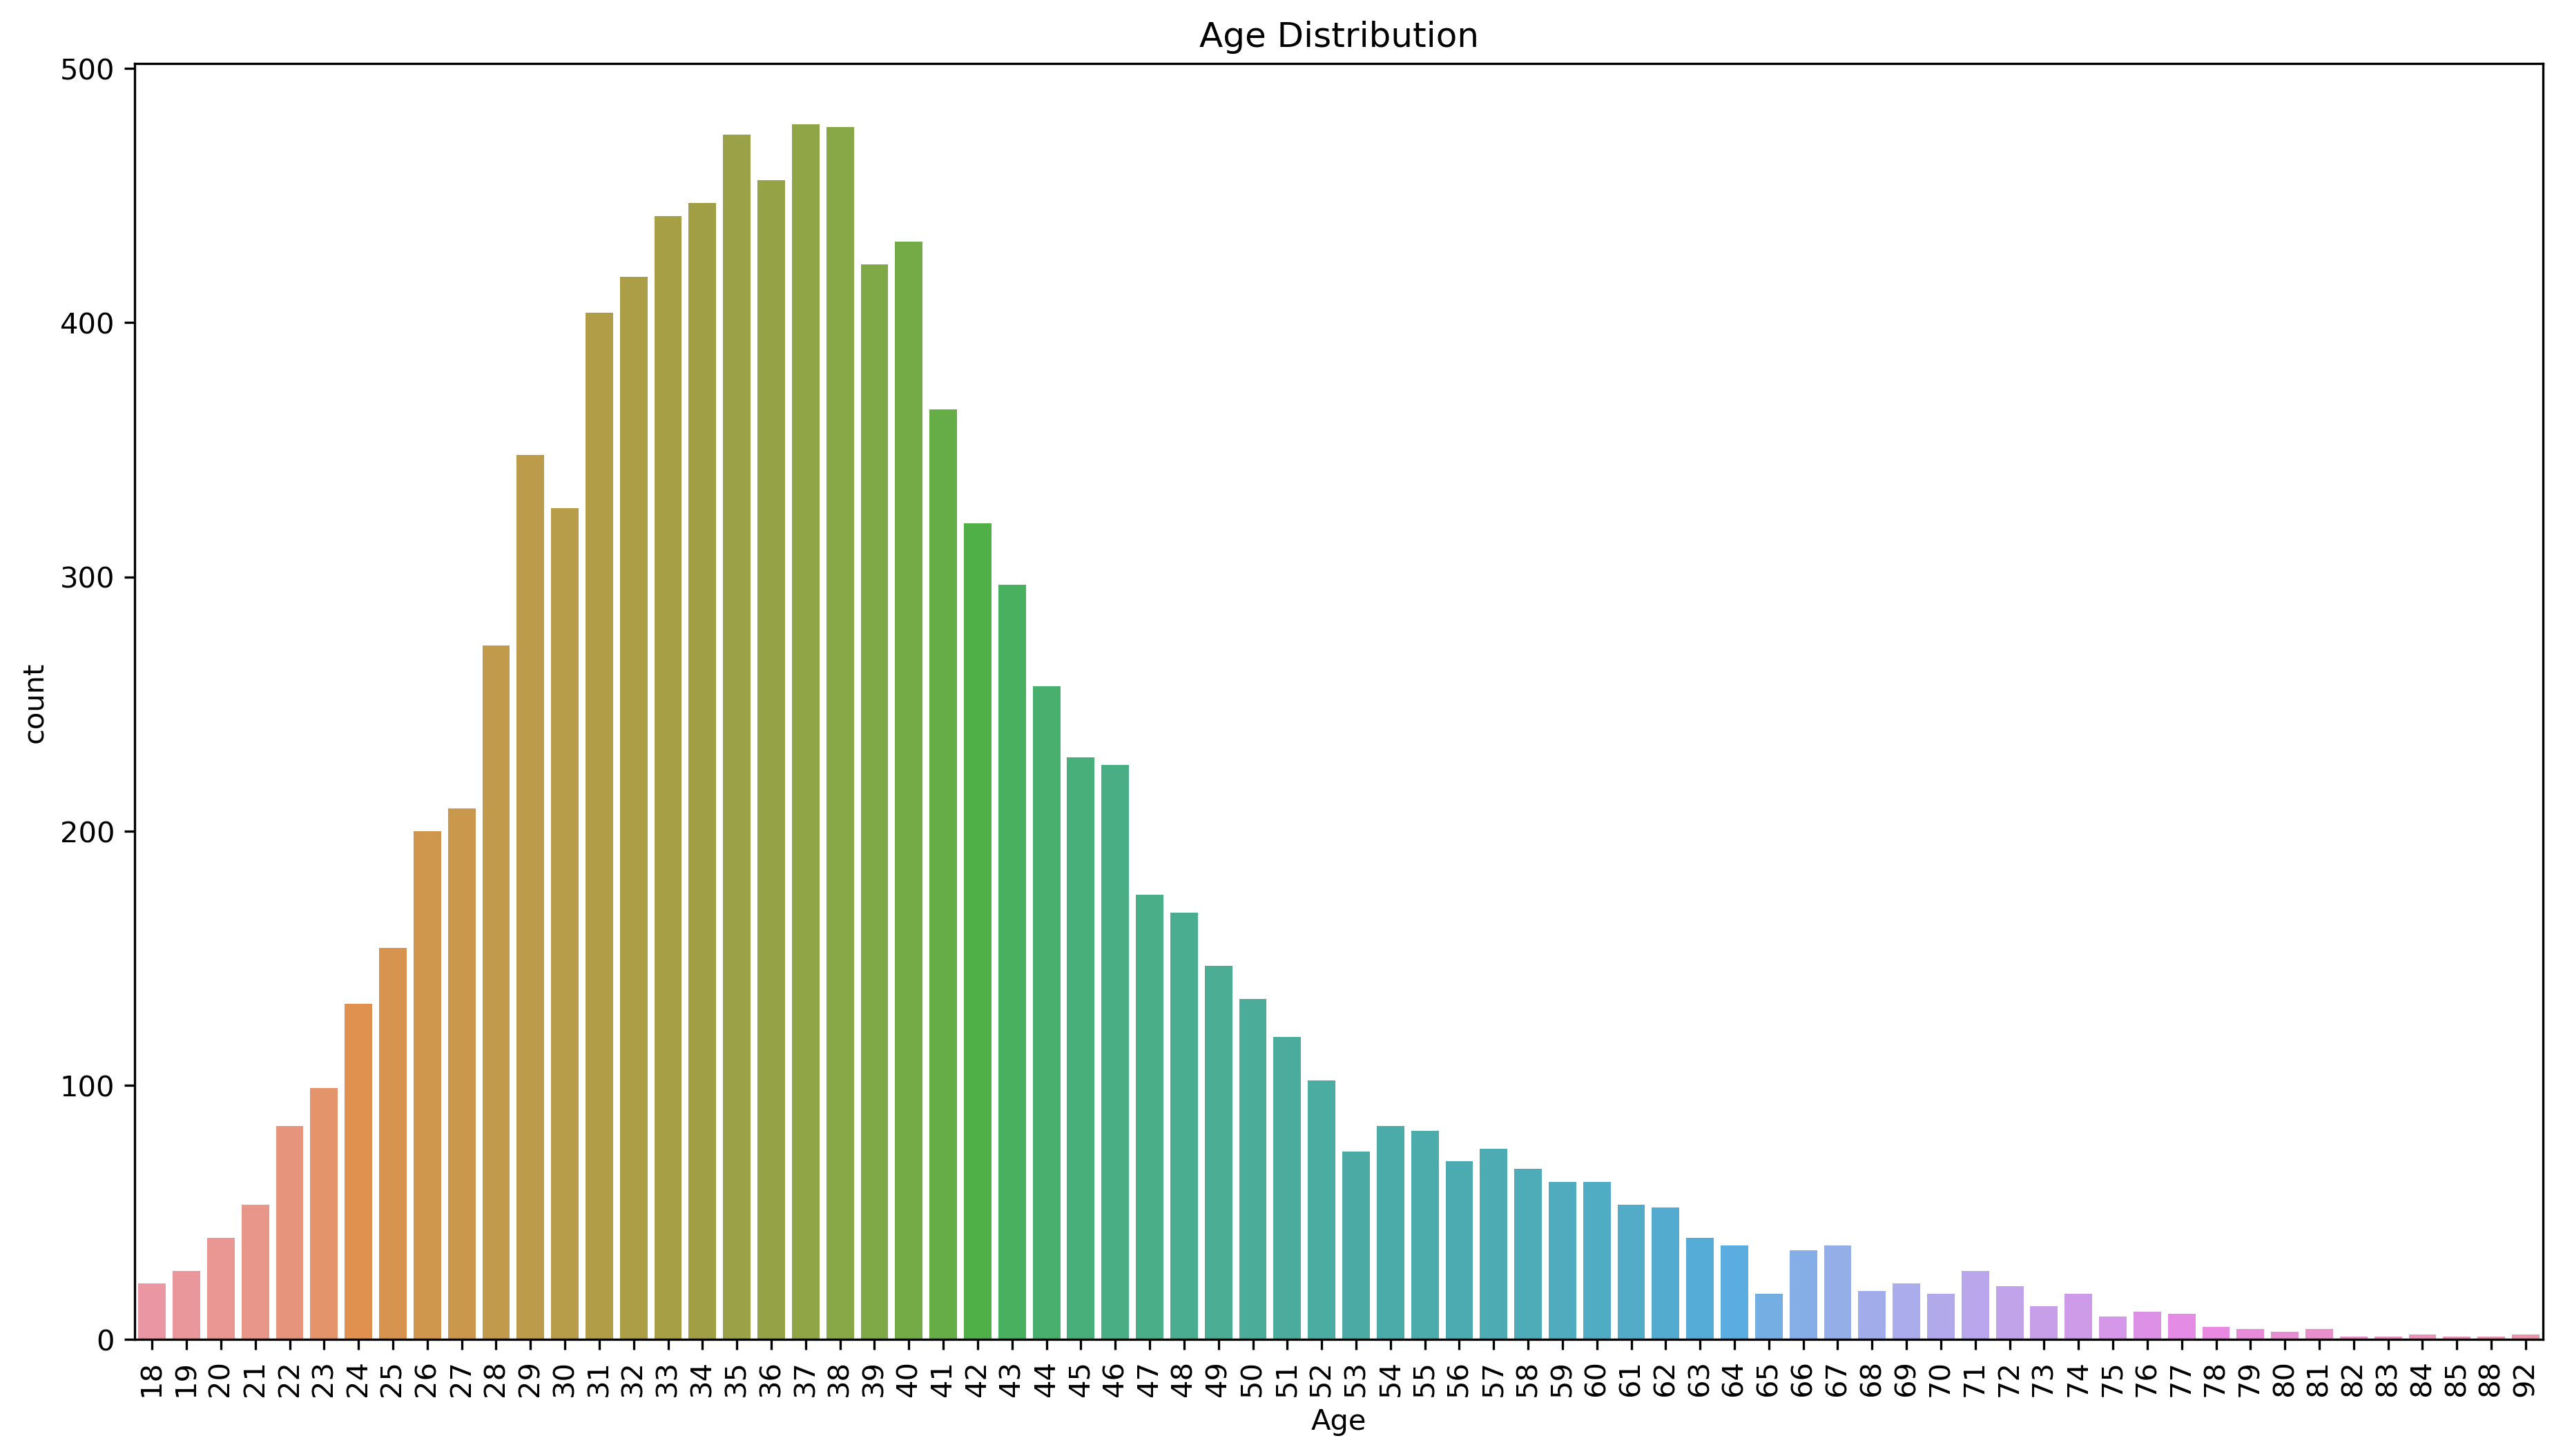

In [49]:
plt.figure(figsize=(15,8),dpi=300)
sns.countplot(df,x='Age')
plt.xticks(rotation=90)
plt.title('Age Distribution')


<Axes: xlabel='Age', ylabel='CreditScore'>

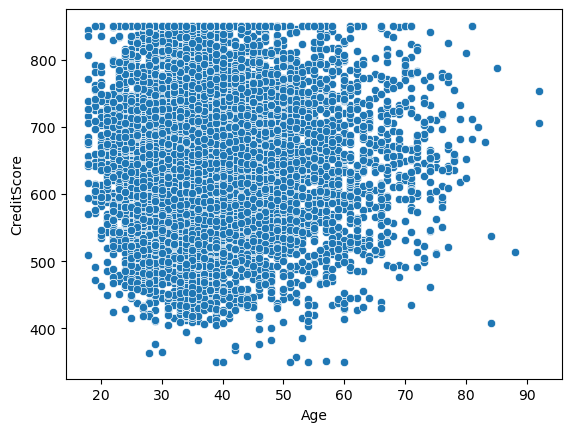

In [50]:
sns.scatterplot(df,x='Age',y='CreditScore')

<Axes: title={'center': 'Age vs CreditScore'}, xlabel='Age', ylabel='CreditScore'>

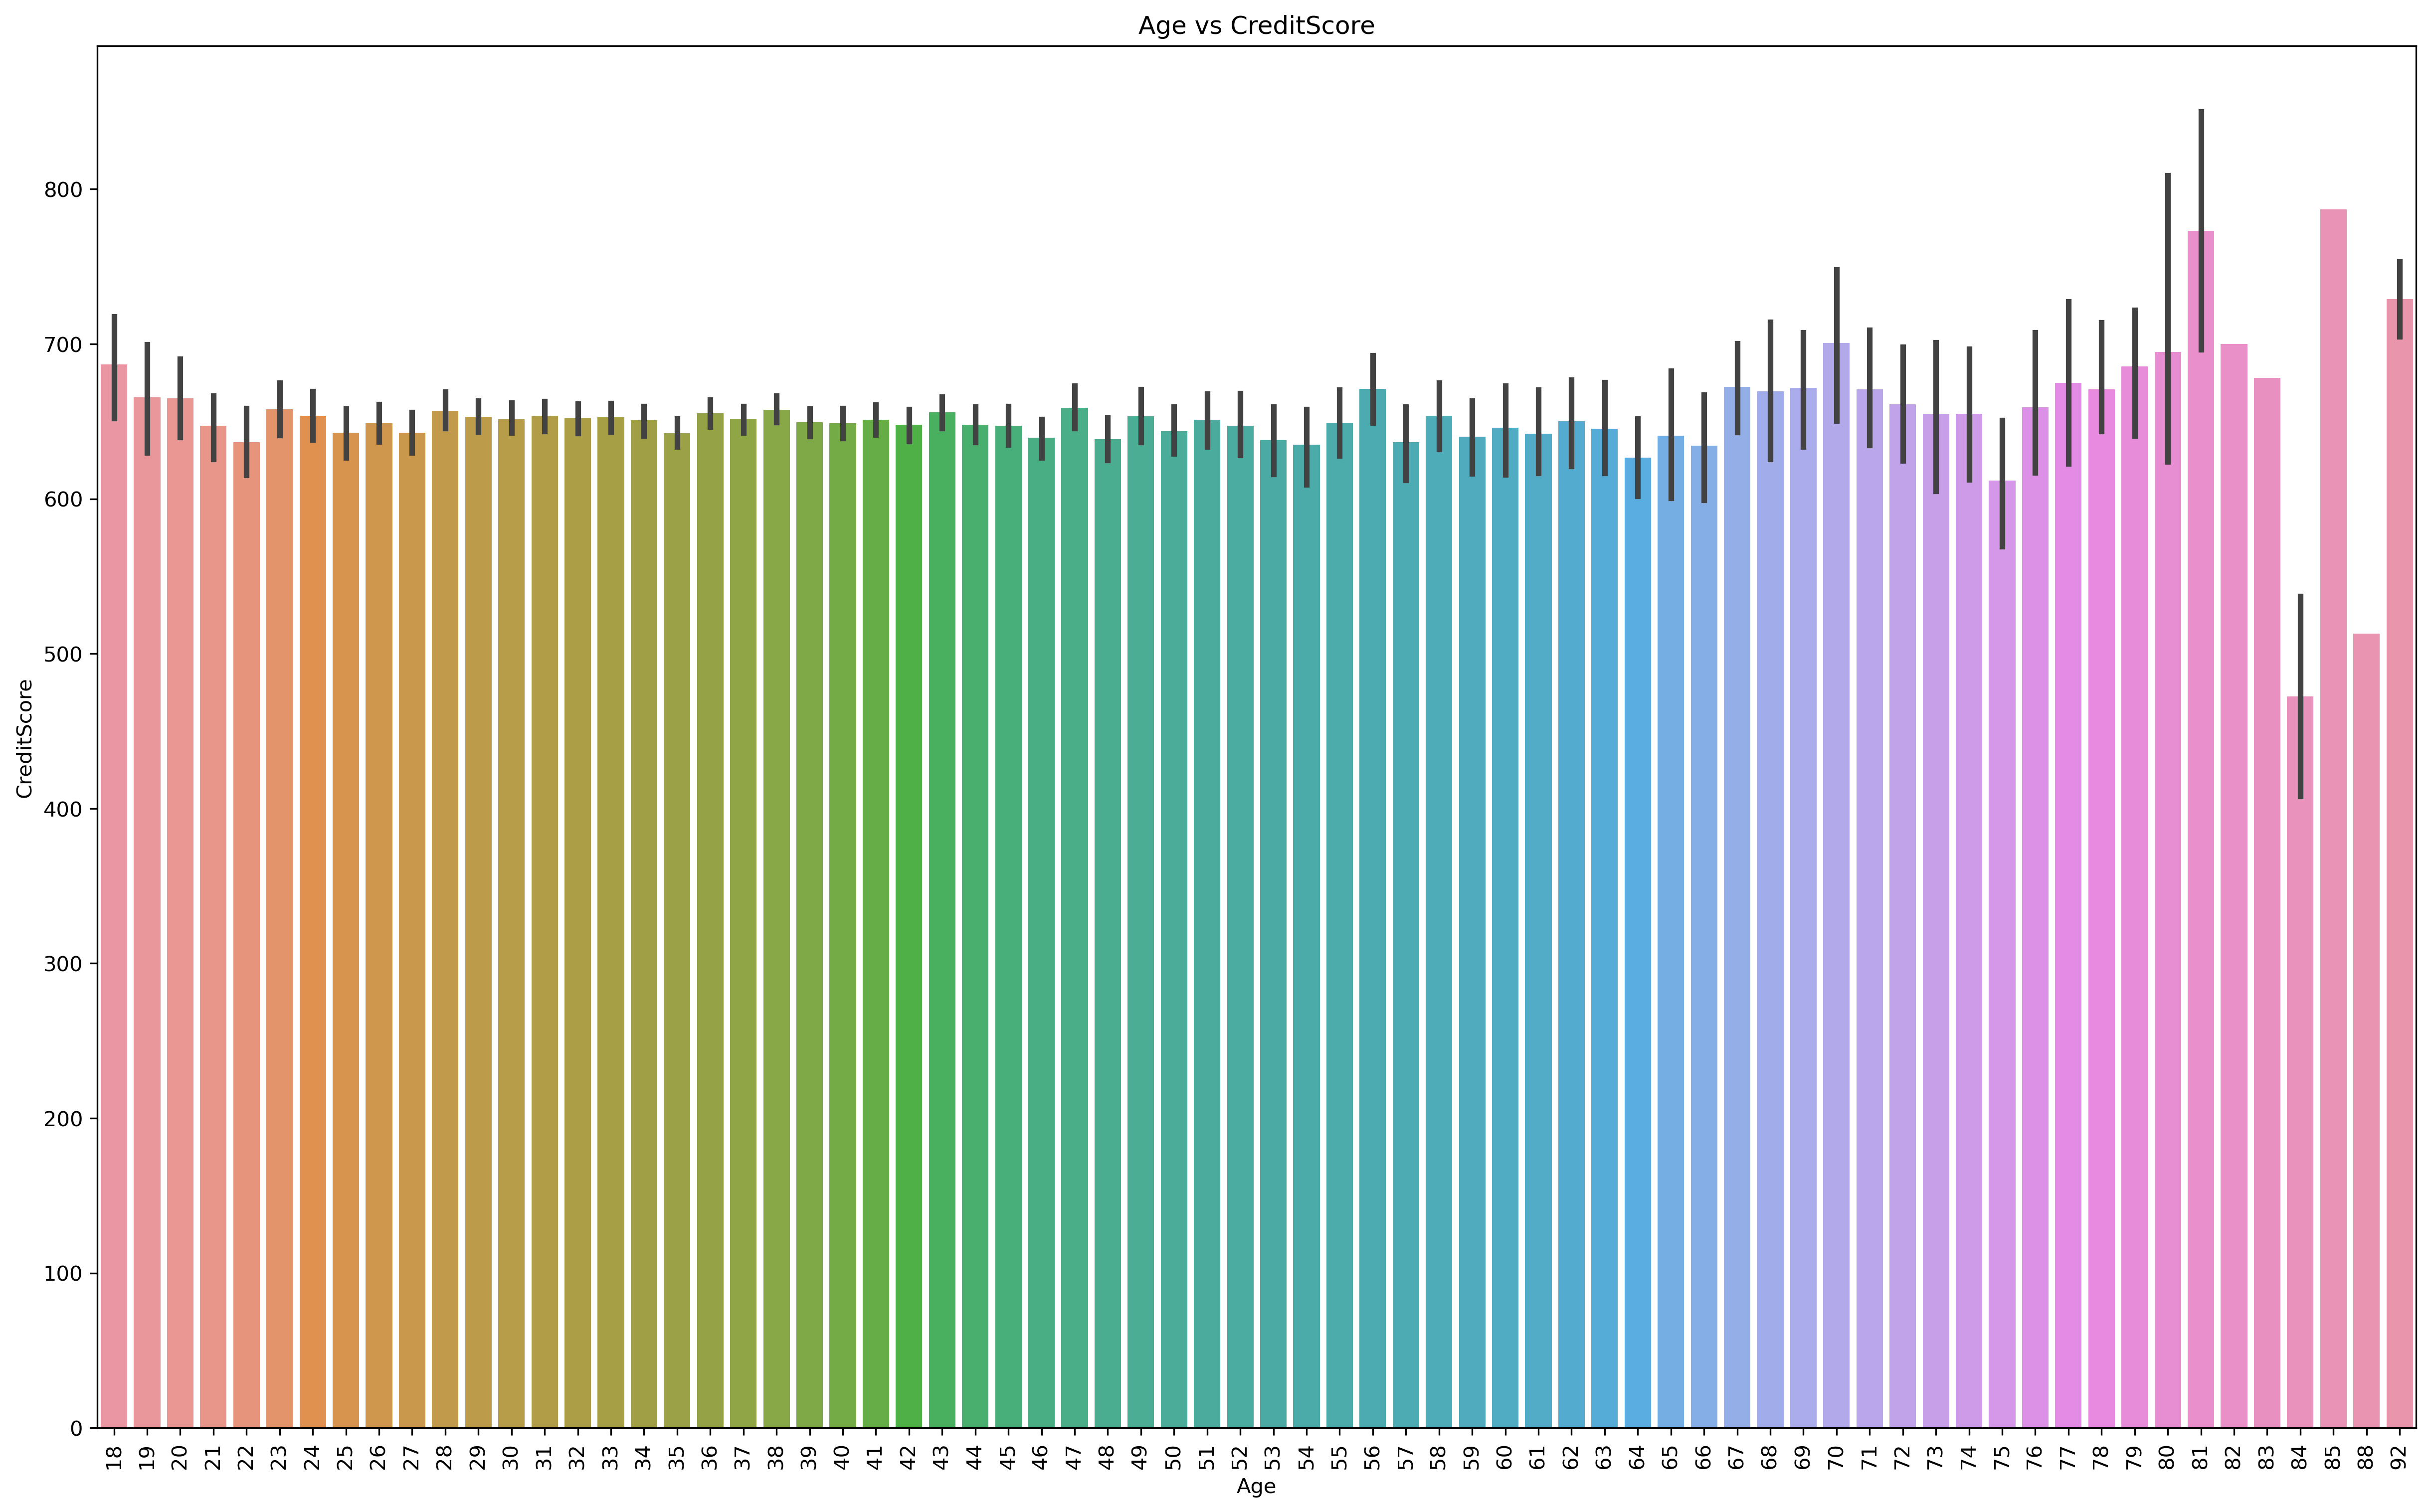

In [51]:
plt.figure(figsize=(20,12),dpi=300)
plt.xticks(rotation=90)
plt.title('Age vs CreditScore')
sns.barplot(df,x='Age',y='CreditScore')

<Axes: xlabel='Age', ylabel='Balance'>

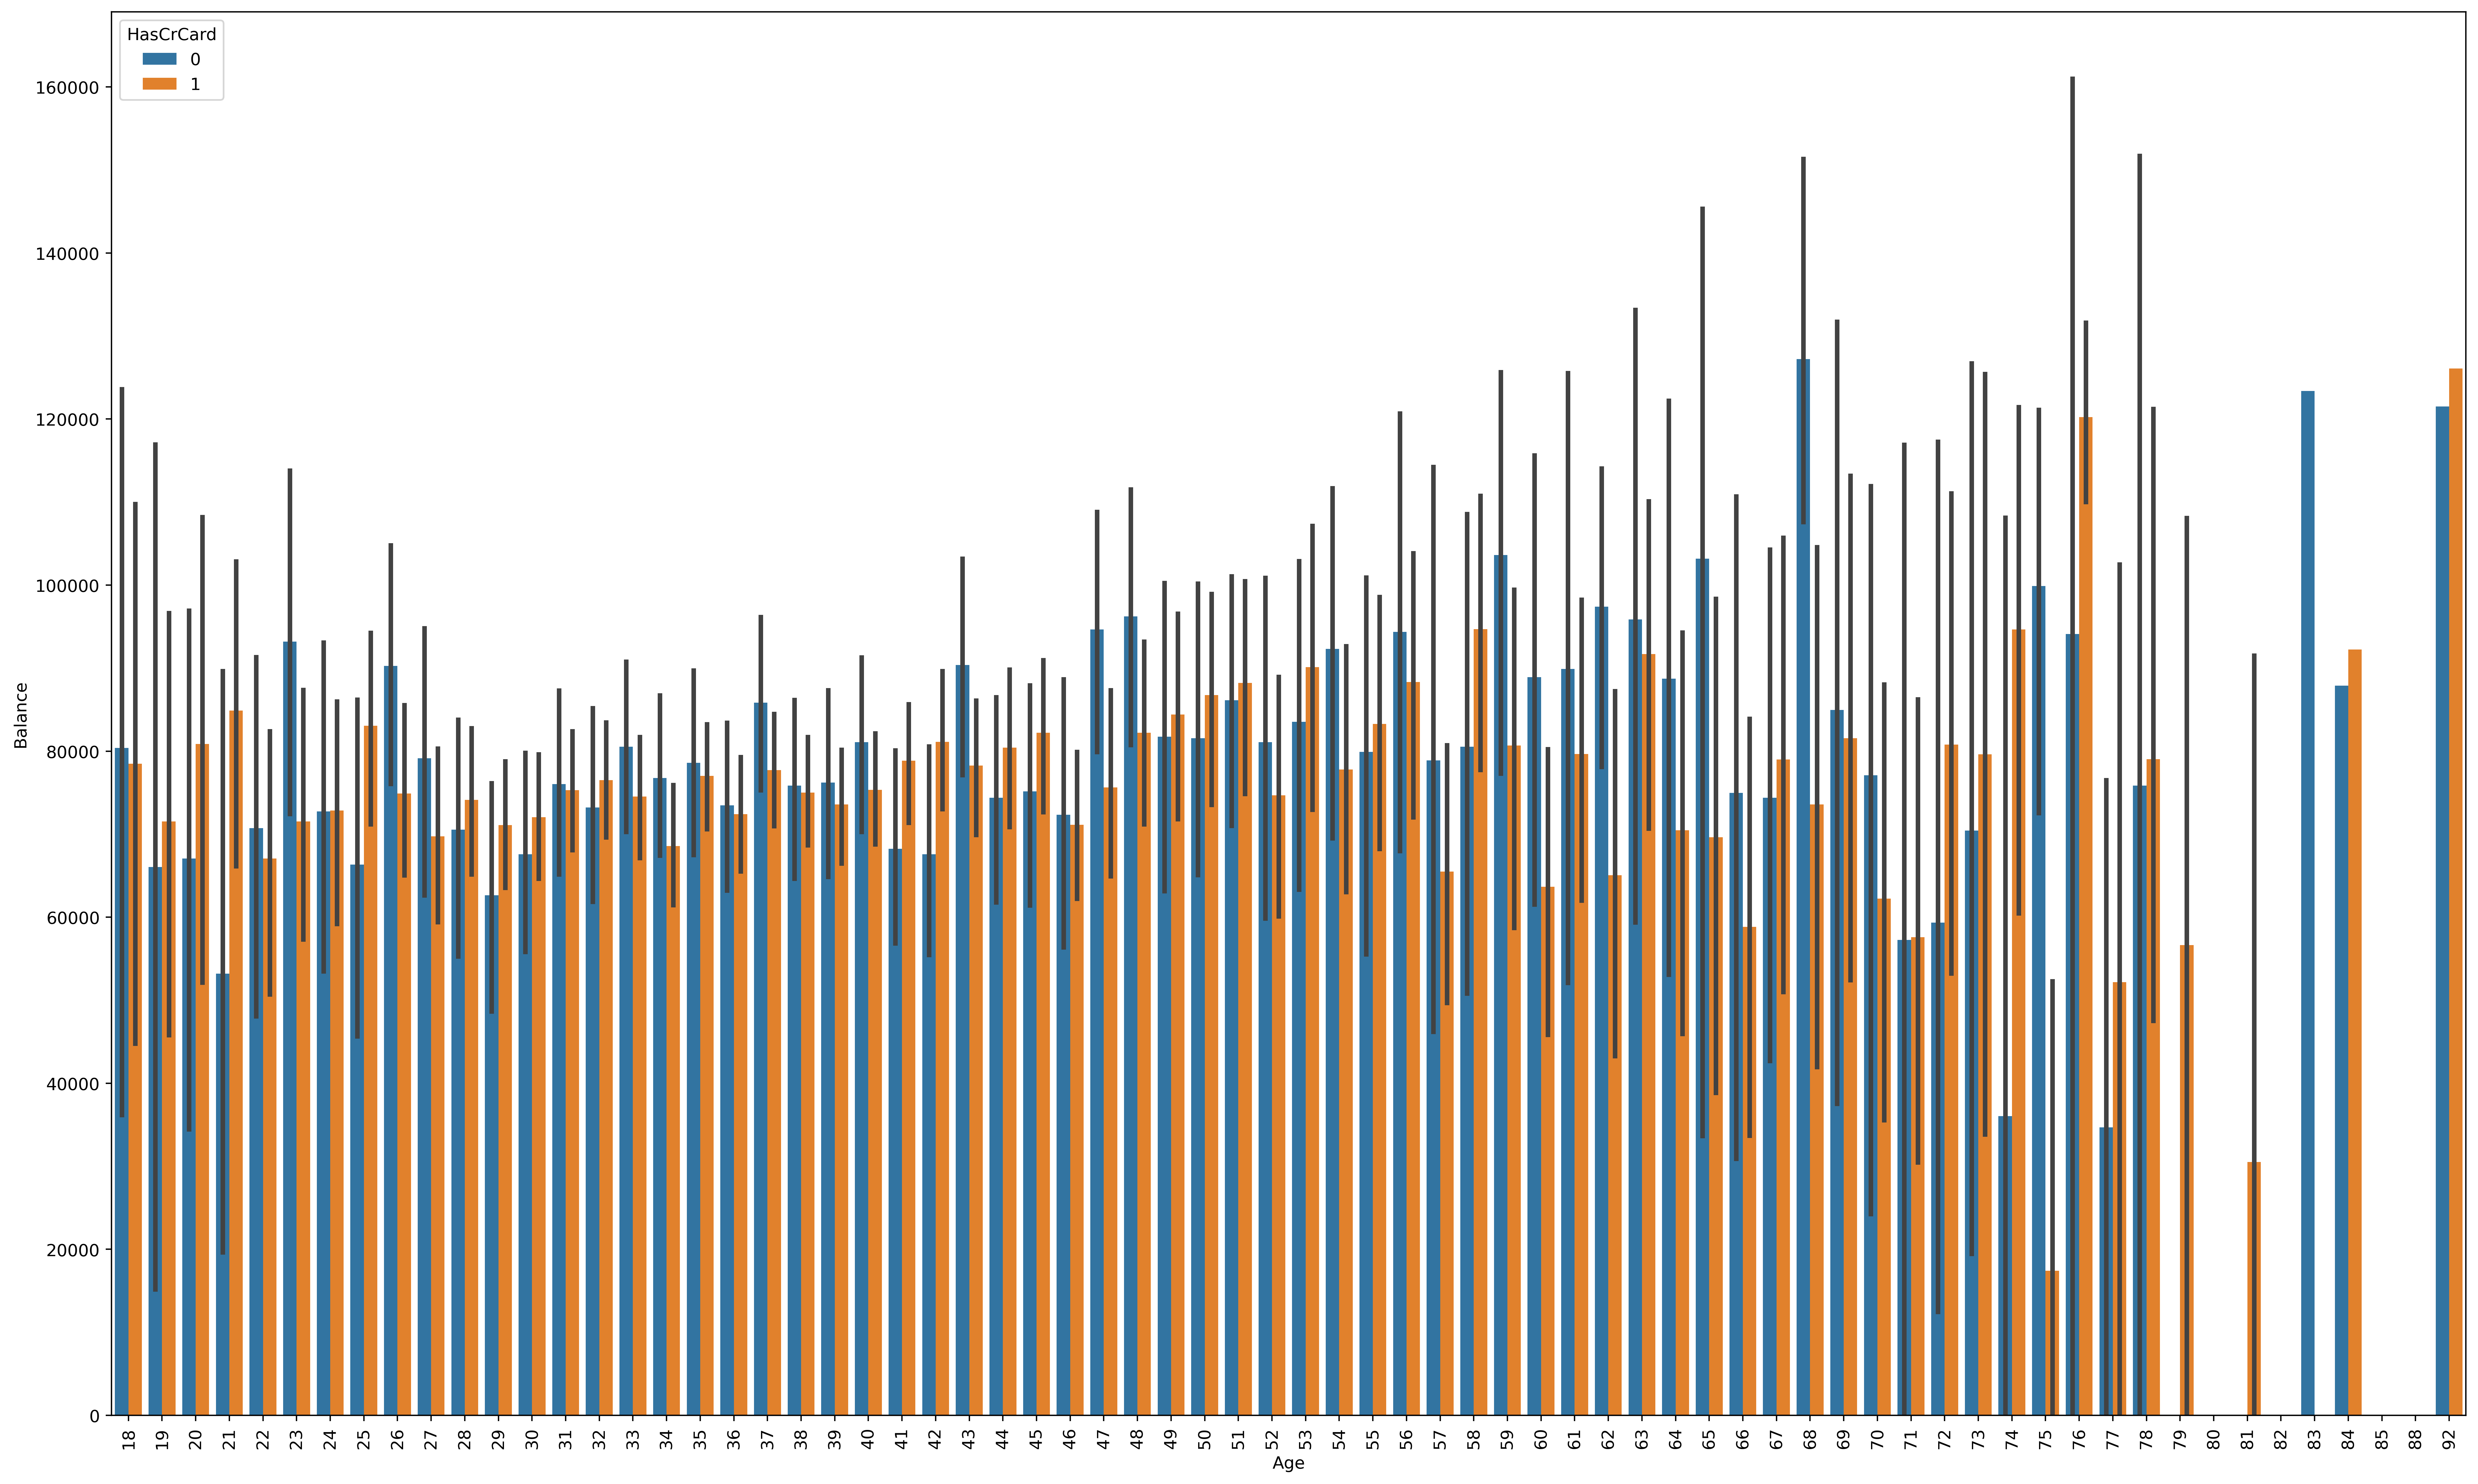

In [52]:
plt.figure(figsize=(25,15),dpi=400)
plt.xticks(rotation=90)
sns.barplot(df,x='Age',y='Balance',hue='HasCrCard')

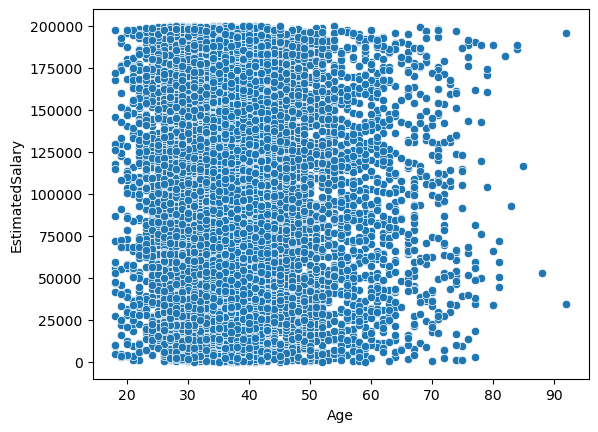

In [53]:
sns.scatterplot(df,x='Age',y='EstimatedSalary');

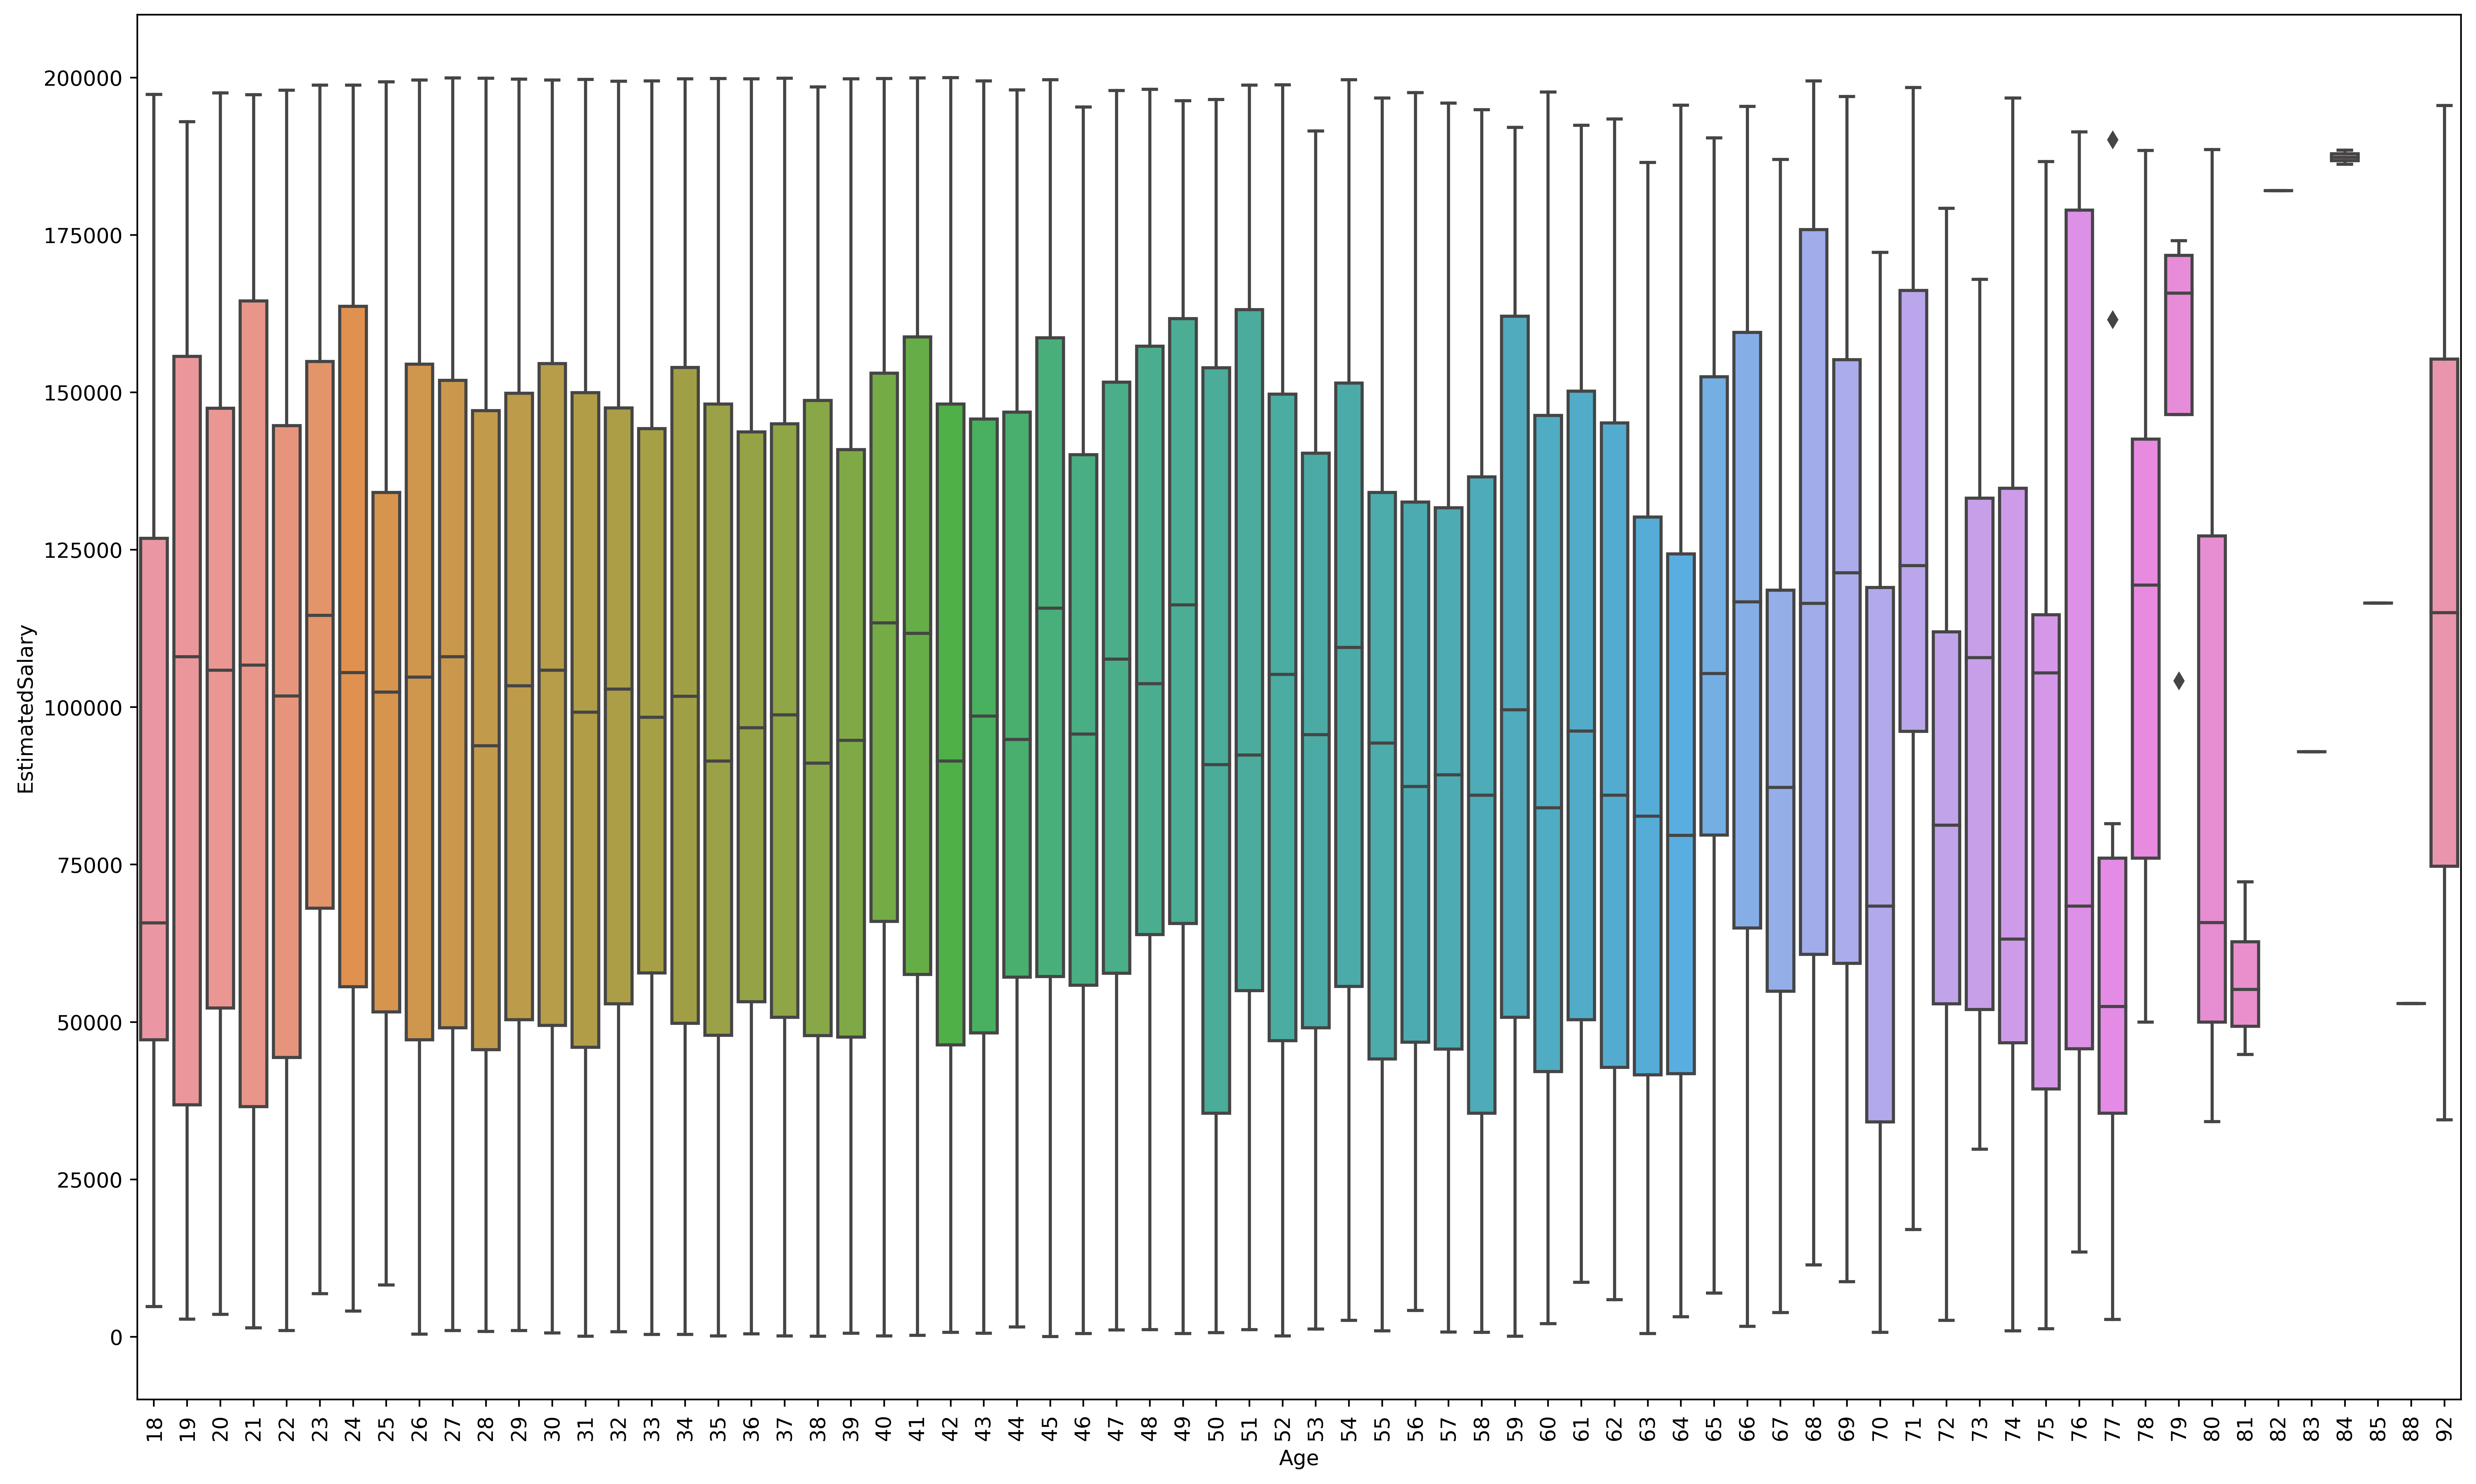

In [54]:
plt.figure(figsize=(20,12),dpi=500)
plt.xticks(rotation=90)

sns.boxplot(df,x='Age',y='EstimatedSalary');

### Model Building

In [55]:
# geography and gender should be encoded to integer values
# for that using labelencoder

# Import label encoder 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 

# Encode labels in column 'species'. 
df['Geography']= le.fit_transform(df['Geography']) 
df['Gender']= le.fit_transform(df['Gender']) 

In [56]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [57]:
# get the X and y DATA 
X = df.drop(['Exited'],axis=1)
y = df['Exited']

In [58]:
# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### We are going to use tree based methods first

#### Random Forest

In [59]:
# importing the Library
from sklearn.ensemble import RandomForestClassifier

In [60]:
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [61]:
pred = model.predict(X_test)

In [62]:
# importing the metrics to calculate accuracy and other metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [63]:
accuracy_score(y_test,pred)

0.859

In [64]:
model.score(X_train,y_train)

0.9852857142857143

In [65]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      2416
           1       0.74      0.43      0.54       584

    accuracy                           0.86      3000
   macro avg       0.81      0.70      0.73      3000
weighted avg       0.85      0.86      0.84      3000



Text(0.5, 36.72222222222221, 'Predicted')

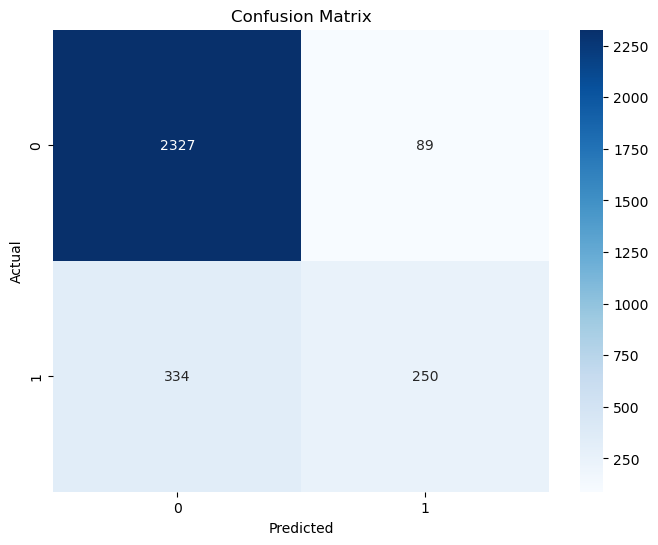

In [66]:
cm = confusion_matrix(y_test,pred)

plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [67]:
# using gridsearch for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [68]:
param_grid = { 
'n_estimators': [25, 50, 100, 150], 
'max_features': ['sqrt', 'log2', None], 
'max_depth': [3, 6, 9], 
'max_leaf_nodes': [3, 6, 9], 
} 


In [69]:
grid_model = GridSearchCV(model,param_grid)
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=10),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]})

In [70]:
grid_pred = grid_model.predict(X_test)

In [71]:
a = accuracy_score(y_test,grid_pred)
a

0.861

In [72]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2416
           1       0.78      0.40      0.53       584

    accuracy                           0.86      3000
   macro avg       0.82      0.69      0.72      3000
weighted avg       0.85      0.86      0.84      3000



Text(0.5, 36.72222222222221, 'Predicted')

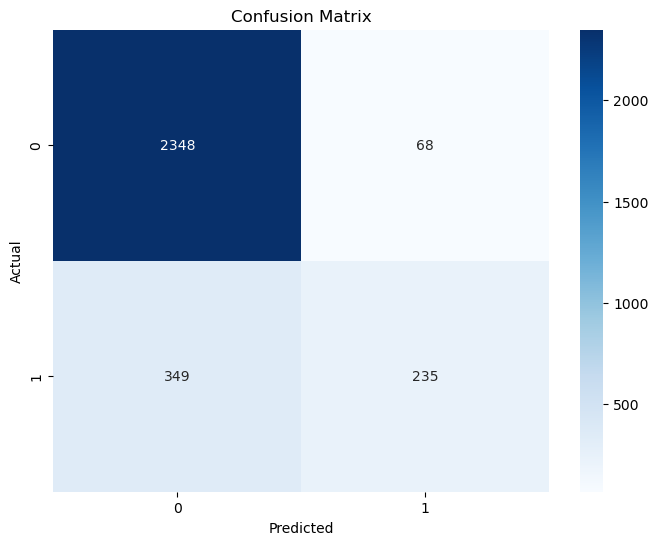

In [73]:
cm = confusion_matrix(y_test,grid_pred)

plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

### Gradient Boosting

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
model = GradientBoostingClassifier()
model.fit(X_train,y_train)

GradientBoostingClassifier()

In [76]:
pred = model.predict(X_test)
accuracy_score(y_test,pred)

0.87

In [77]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

In [78]:
grid_model = GridSearchCV(model,parameters,cv=5,verbose=1,n_jobs=-1)
grid_model.fit(X_train,y_train)
grid_pred = grid_model.predict(X_test)
b = accuracy_score(y_test,grid_pred)
b

Fitting 5 folds for each of 84672 candidates, totalling 423360 fits


C:\Users\hemmu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
211680 fits failed out of a total of 423360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
79380 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hemmu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hemmu\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 420, in fit
    self._validate_params()
  File "C:\Users\hemmu\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\hemmu\anaconda3\lib\site-

0.822

In [79]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      2416
           1       0.75      0.13      0.22       584

    accuracy                           0.82      3000
   macro avg       0.78      0.56      0.56      3000
weighted avg       0.81      0.82      0.77      3000



Text(0.5, 36.72222222222221, 'Predicted')

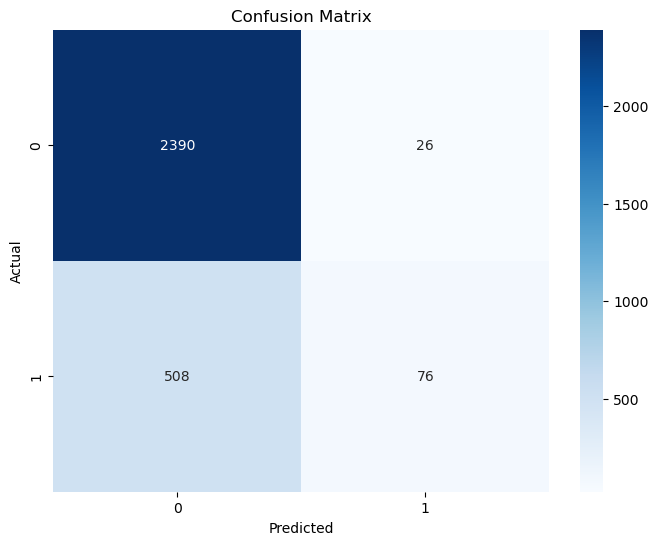

In [80]:
cm = confusion_matrix(y_test,grid_pred)

plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

#### Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [83]:
pred = model.predict(X_test)

In [84]:
accuracy_score(y_test,pred)

0.797

In [85]:
param_grid = {
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}

In [86]:
grid_model = GridSearchCV(model,param_grid,cv=5,verbose=1,n_jobs=-1)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [87]:
grid_pred = grid_model.predict(X_test)

In [88]:
c = accuracy_score(y_test,grid_pred)
c

0.8613333333333333

In [89]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2416
           1       0.82      0.37      0.51       584

    accuracy                           0.86      3000
   macro avg       0.84      0.68      0.71      3000
weighted avg       0.86      0.86      0.84      3000



Text(0.5, 112.16666666666664, 'Predicted')

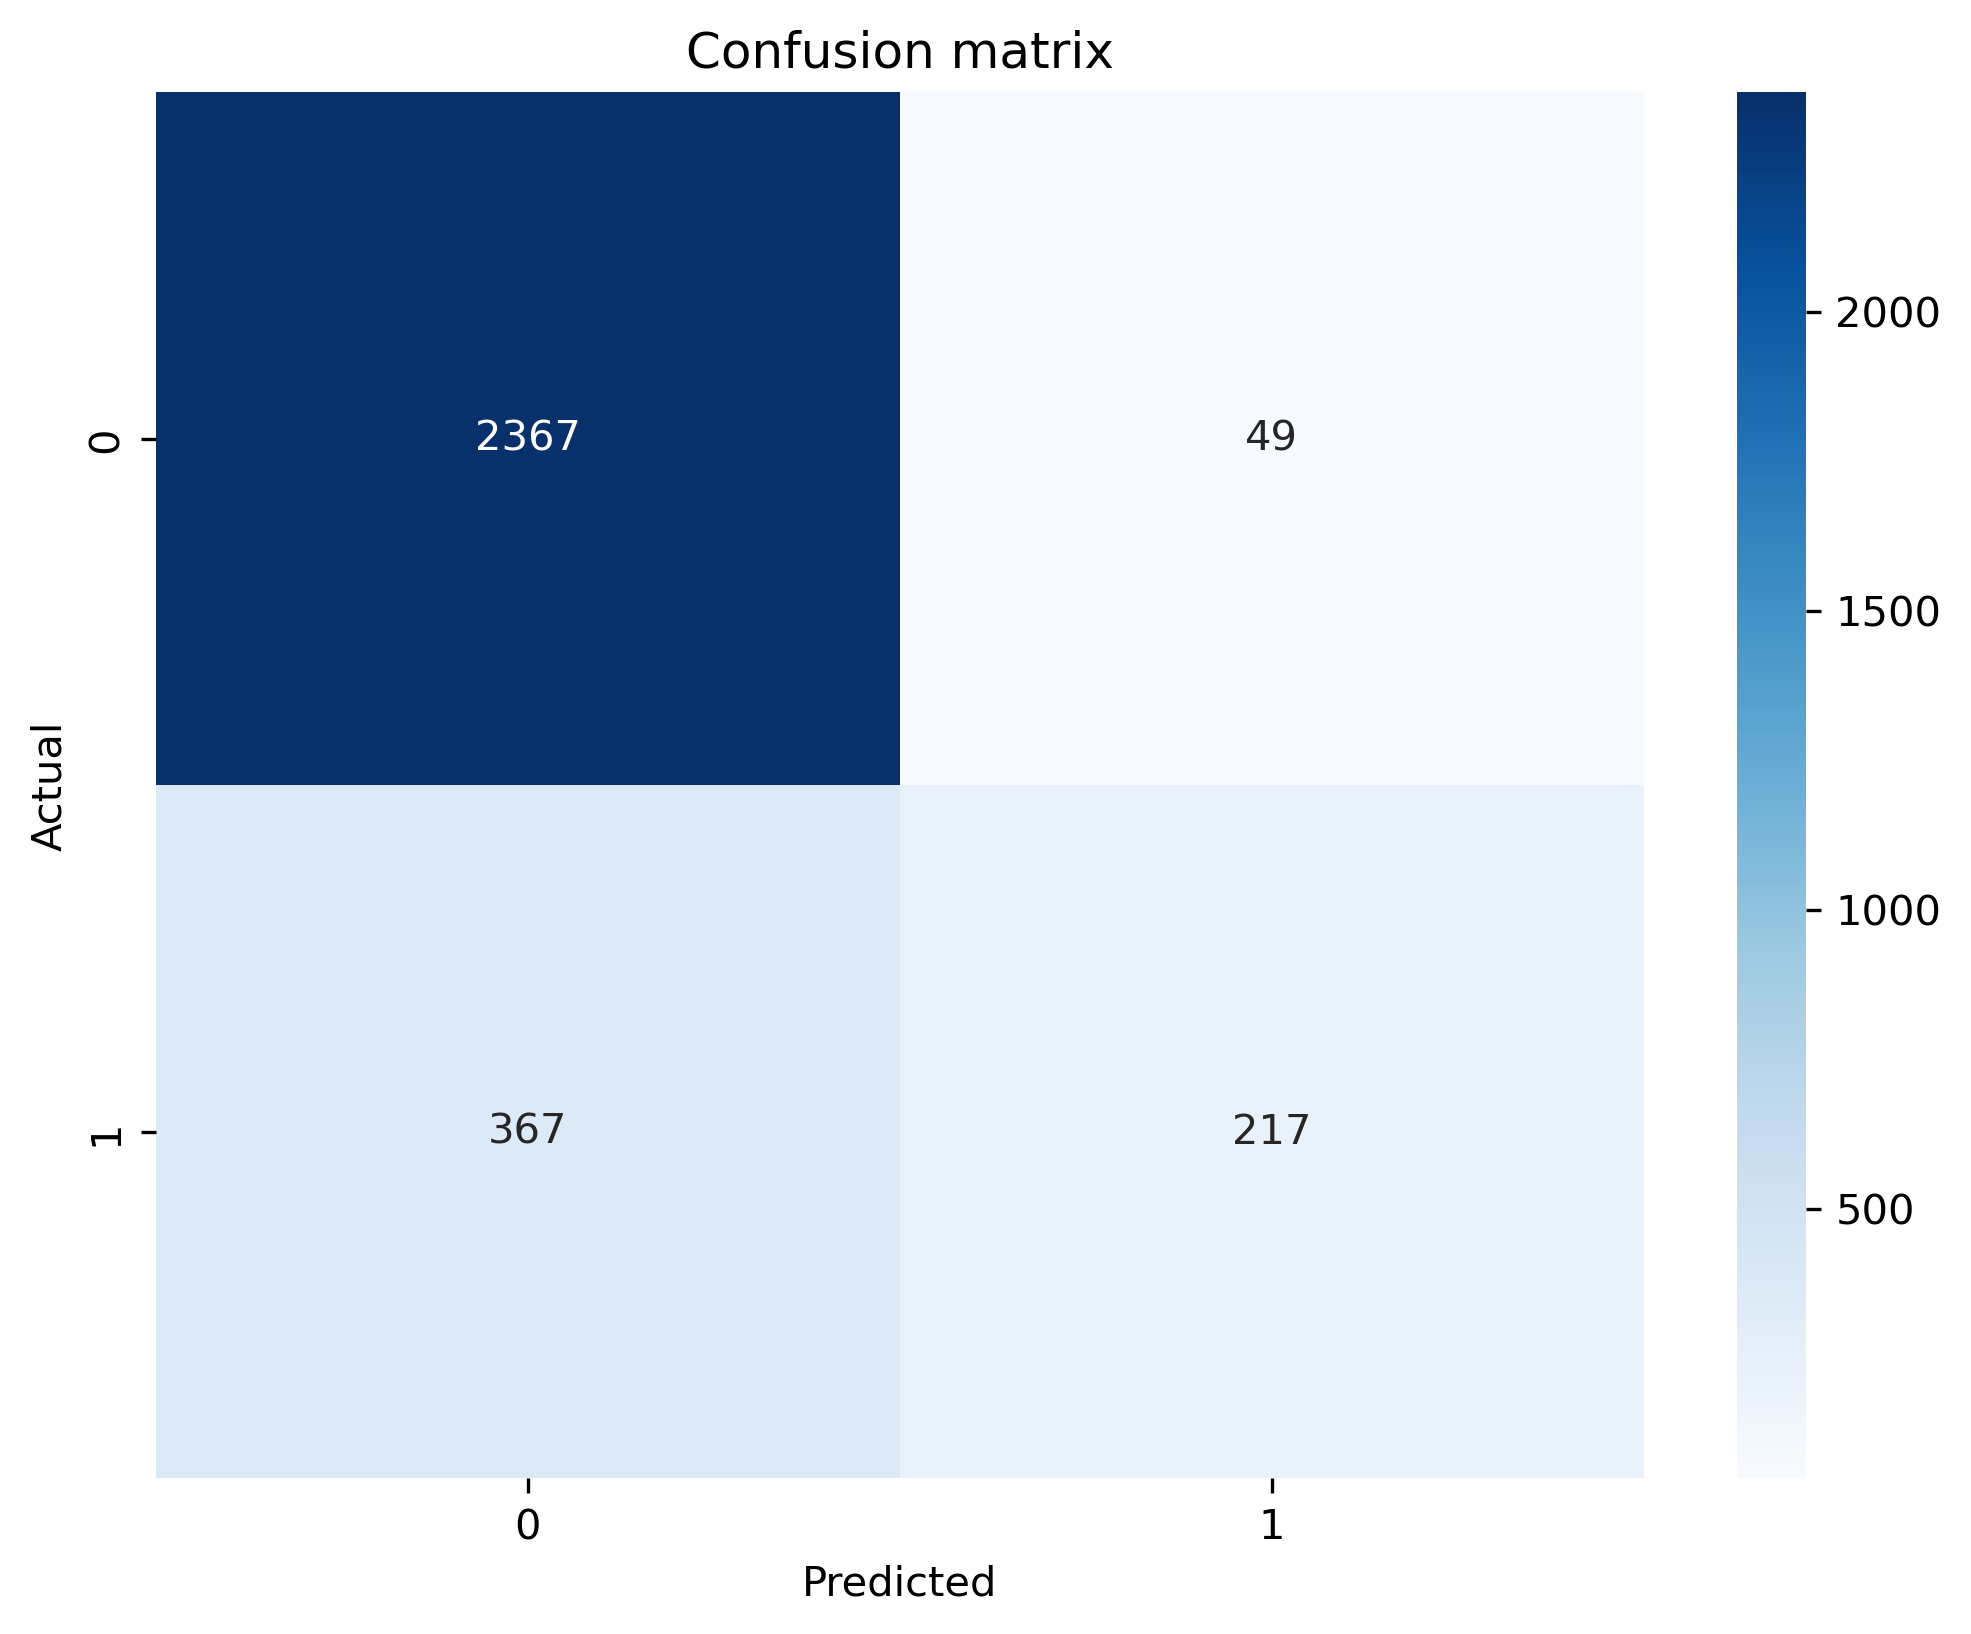

In [90]:
cm = confusion_matrix(y_test,grid_pred)
plt.figure(figsize=(8,6),dpi=300)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [91]:
from xgboost import XGBClassifier

In [92]:
model = XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [93]:
pred = model.predict(X_test)

In [94]:
accuracy_score(y_test,pred)

0.8593333333333333

In [95]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [96]:
grid_model = GridSearchCV(model,params,verbose=1,cv=5,n_jobs=-1)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5], 'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 5, 10],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=1)

In [97]:
grid_pred = grid_model.predict(X_test)

In [98]:
d = accuracy_score(grid_pred,y_test)
d

0.8673333333333333

In [99]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.76      0.46      0.58       584

    accuracy                           0.87      3000
   macro avg       0.82      0.71      0.75      3000
weighted avg       0.86      0.87      0.85      3000



Text(0.5, 148.88888888888883, 'Predicted')

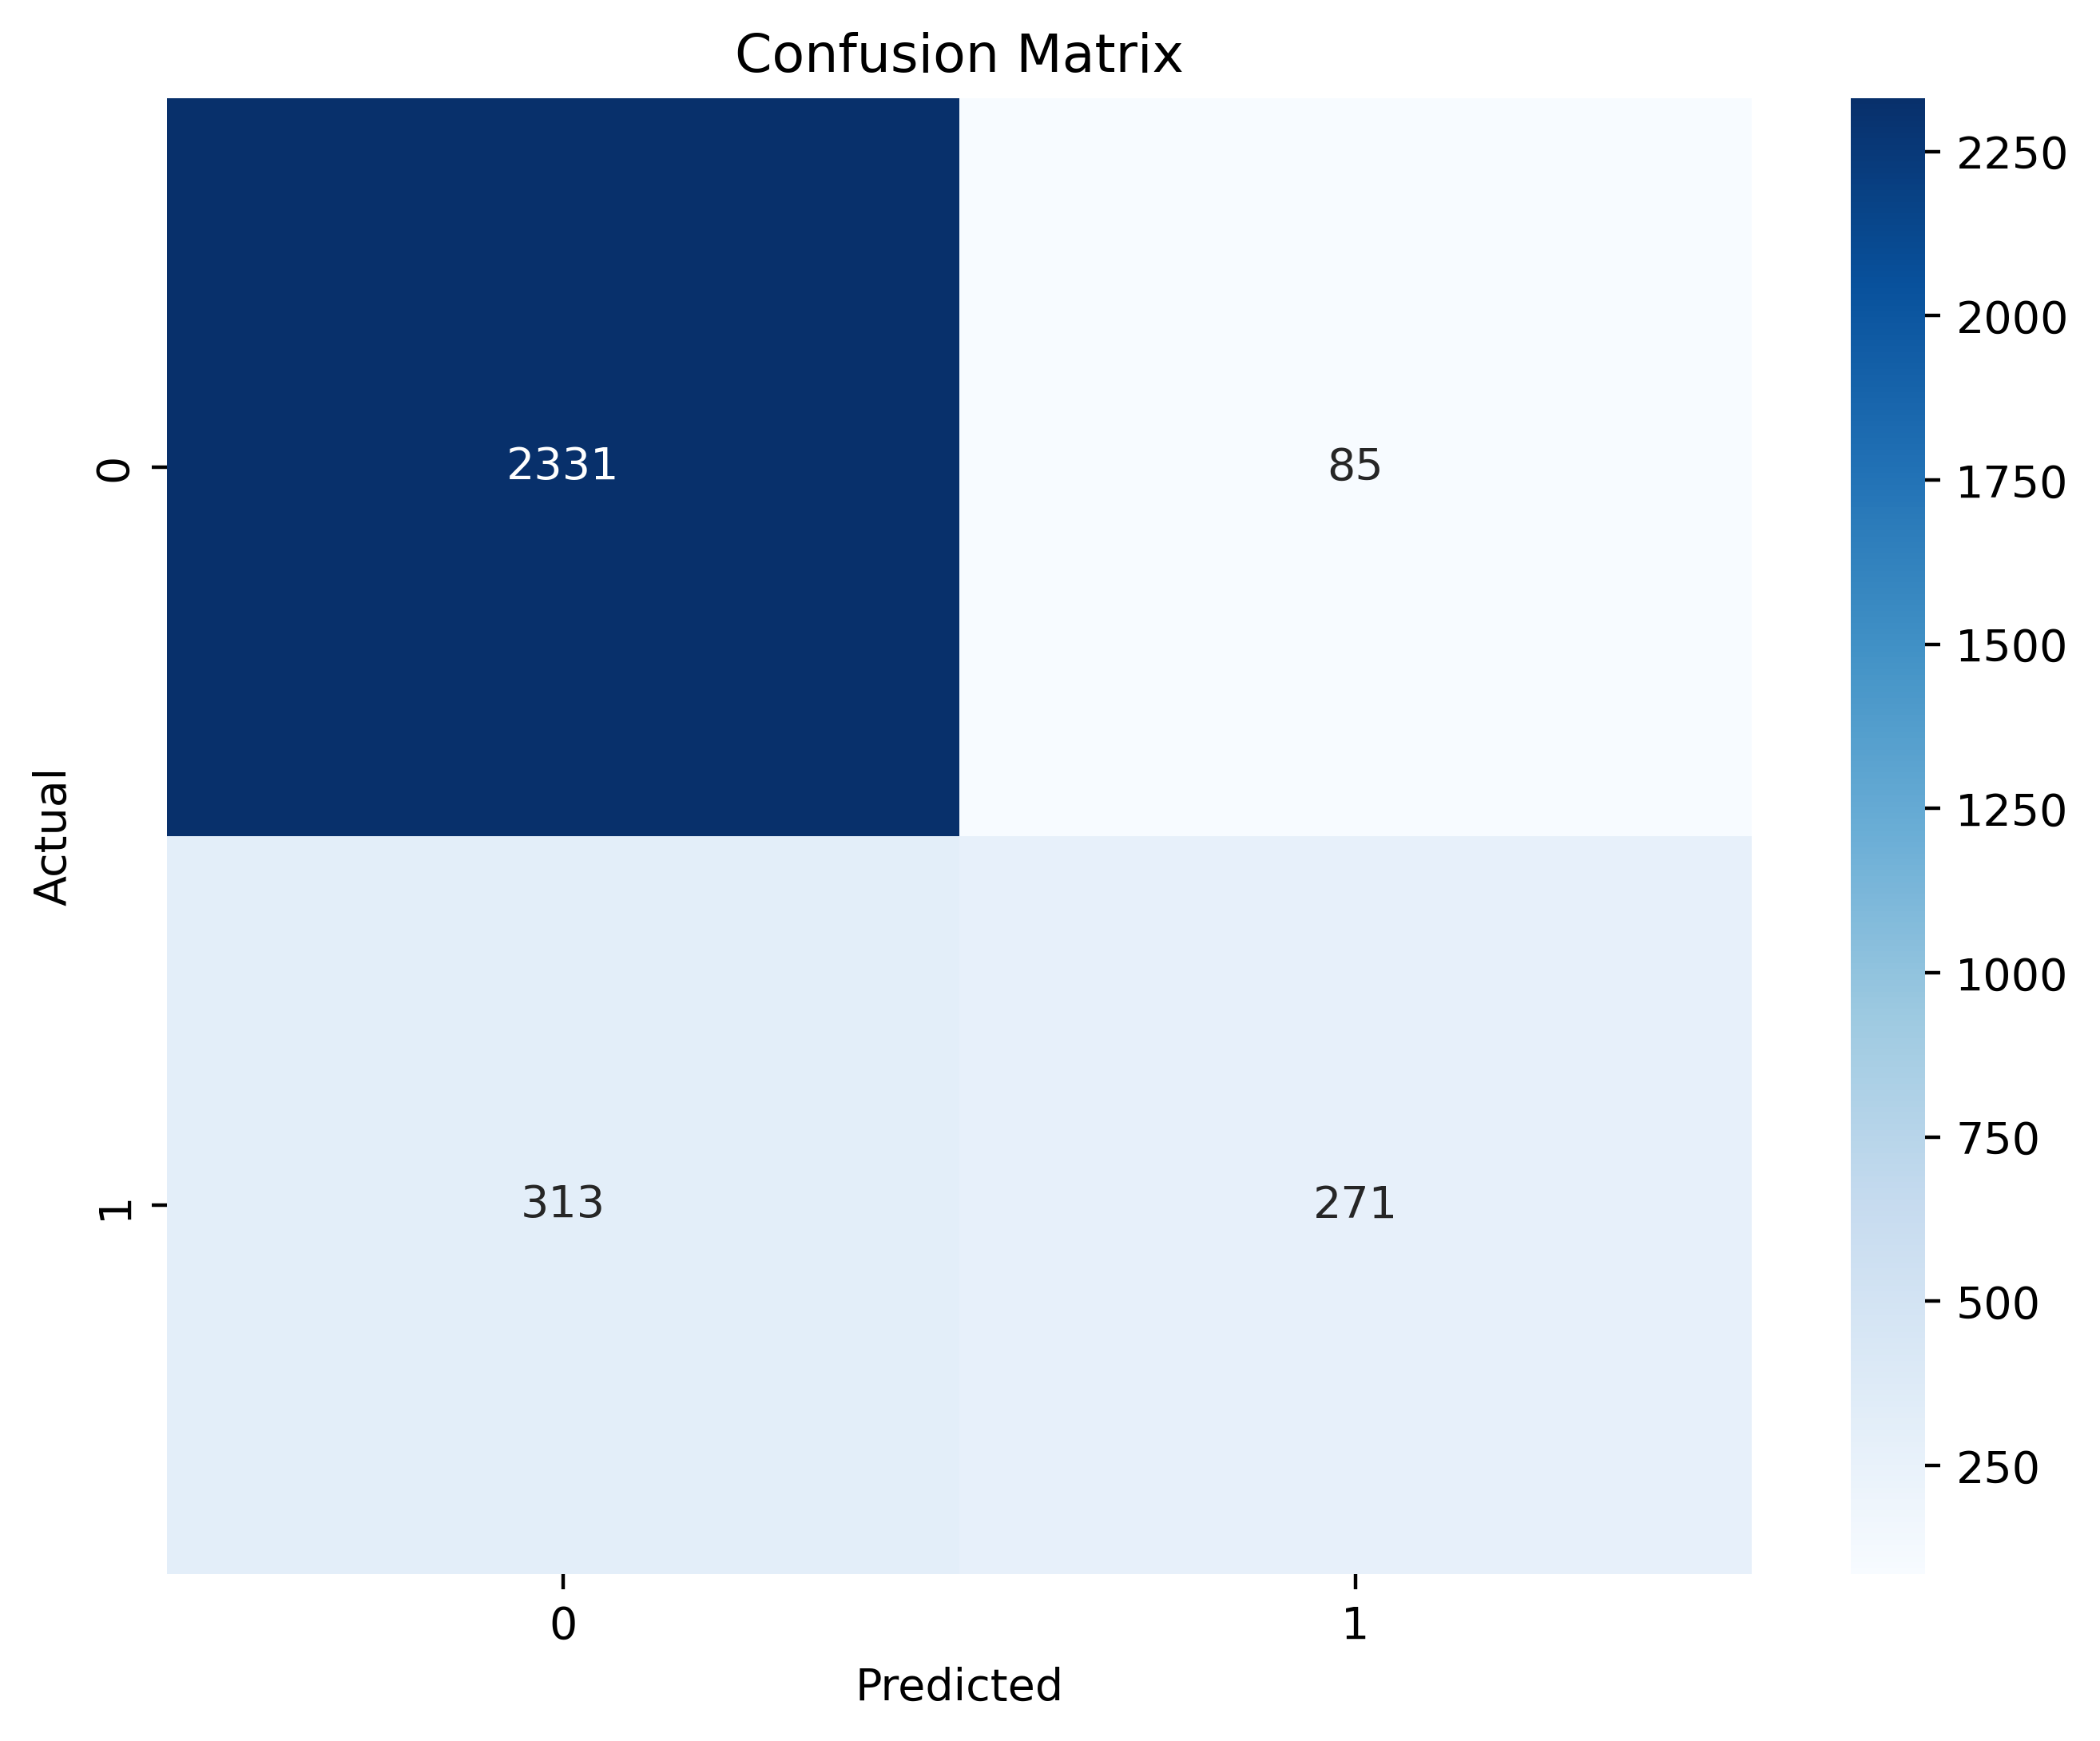

In [100]:
cm = confusion_matrix(y_test,grid_pred)

plt.figure(figsize=(8,6),dpi=400)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')

### Logistic Regression

In [101]:
#before importing logistic Regression , we need to standardize the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
model = LogisticRegression(max_iter=1000,solver='saga',tol=0.1)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, solver='saga', tol=0.1)

In [104]:
pred = model.predict(X_test)

In [105]:
accuracy_score(y_test,pred)

0.8173333333333334

In [106]:
pen = ['l1','l2','elasticnet']
l1_ratio = np.linspace(0,1,20)
c = np.logspace(0,10,20)

param_grid = {'penalty':pen,'l1_ratio':l1_ratio,
             'C':c}

In [107]:
grid_model = GridSearchCV(model,param_grid,cv=5,verbose=1,n_jobs=-1)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


C:\Users\hemmu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, solver='saga',
                                          tol=0.1),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=1)

In [108]:
grid_pred = grid_model.predict(X_test)

In [109]:
e = accuracy_score(y_test,grid_pred)
e

0.817

In [110]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      2416
           1       0.60      0.18      0.28       584

    accuracy                           0.82      3000
   macro avg       0.71      0.58      0.59      3000
weighted avg       0.79      0.82      0.78      3000



Text(0.5, 148.88888888888883, 'Predicted')

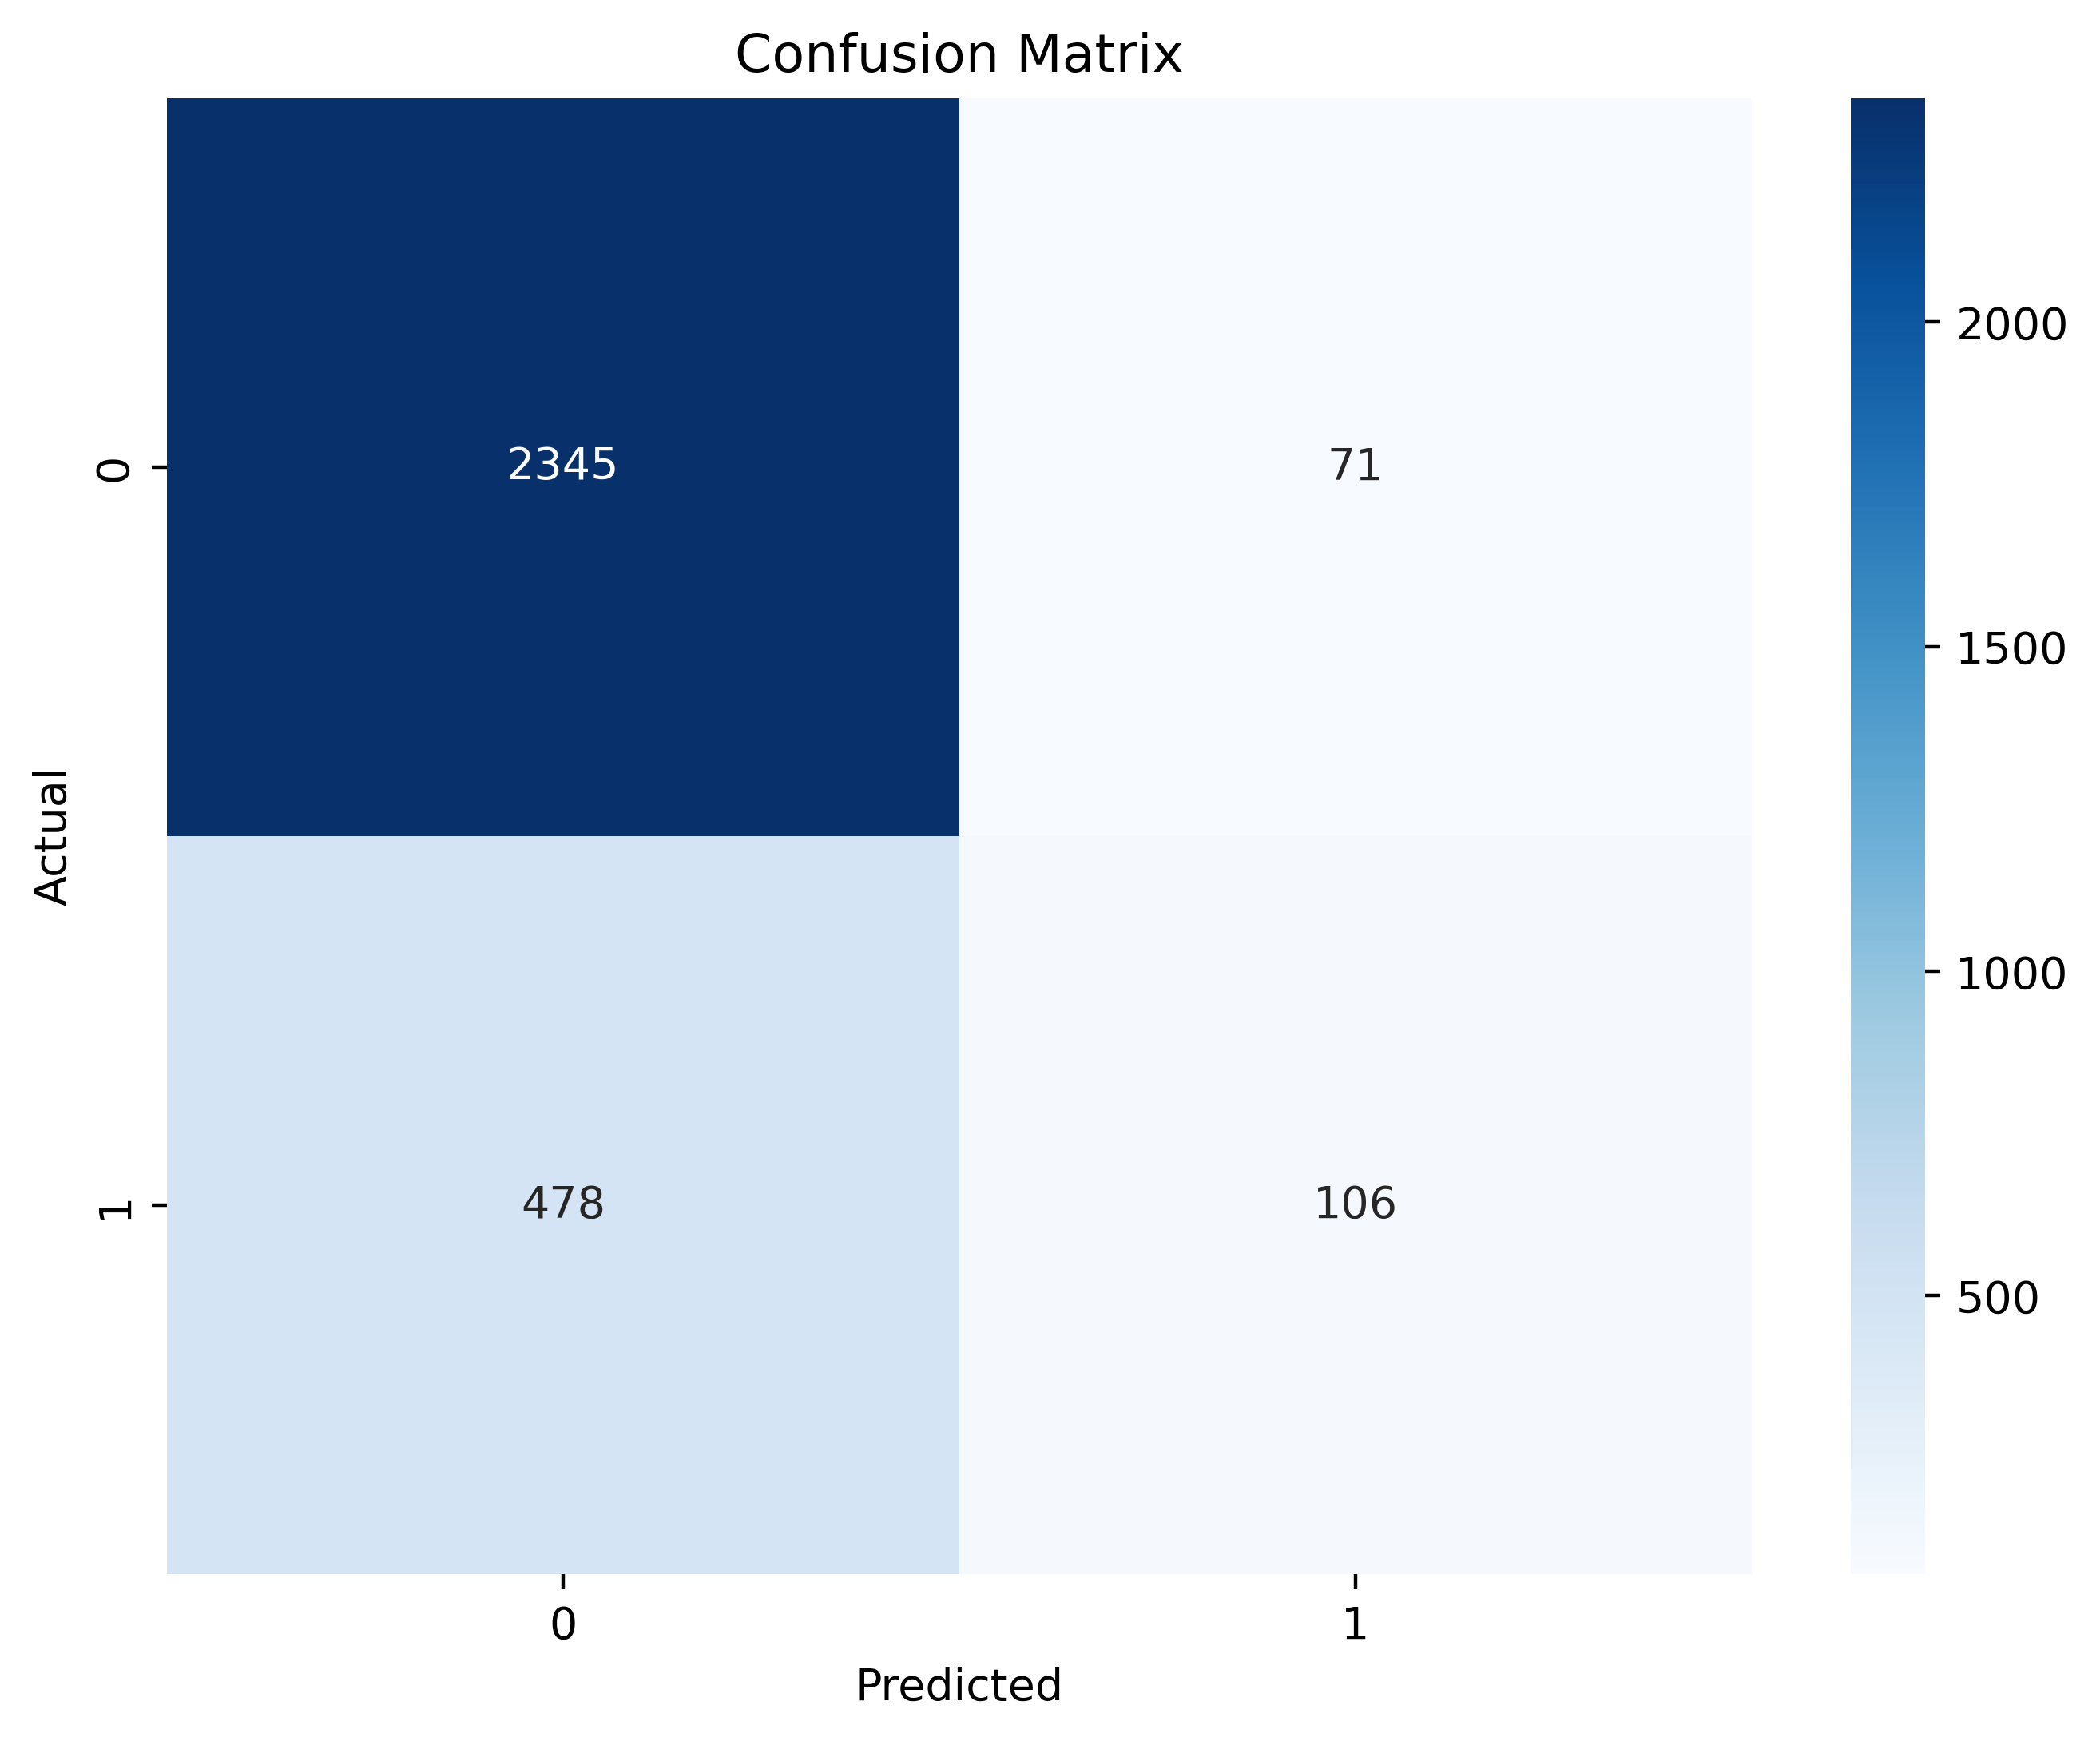

In [111]:
cm = confusion_matrix(y_test,grid_pred)

plt.figure(figsize=(8,6),dpi=400)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')

### KNN

In [112]:
from sklearn.neighbors import KNeighborsClassifier

In [113]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)


KNeighborsClassifier()

In [114]:
pred = model.predict(X_test)

In [115]:
accuracy_score(y_test,pred)

0.838

In [116]:
param_grid = {
    'n_neighbors':range(1,31)
}


In [117]:
grid_model = GridSearchCV(model,param_grid,cv=5,verbose=1,n_jobs=-1)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31)}, verbose=1)

In [118]:
grid_pred = grid_model.predict(X_test)

In [119]:
f = accuracy_score(y_test,grid_pred)
f

0.8443333333333334

In [120]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2416
           1       0.72      0.33      0.45       584

    accuracy                           0.84      3000
   macro avg       0.79      0.65      0.68      3000
weighted avg       0.83      0.84      0.82      3000



Text(0.5, 148.88888888888883, 'Predicted')

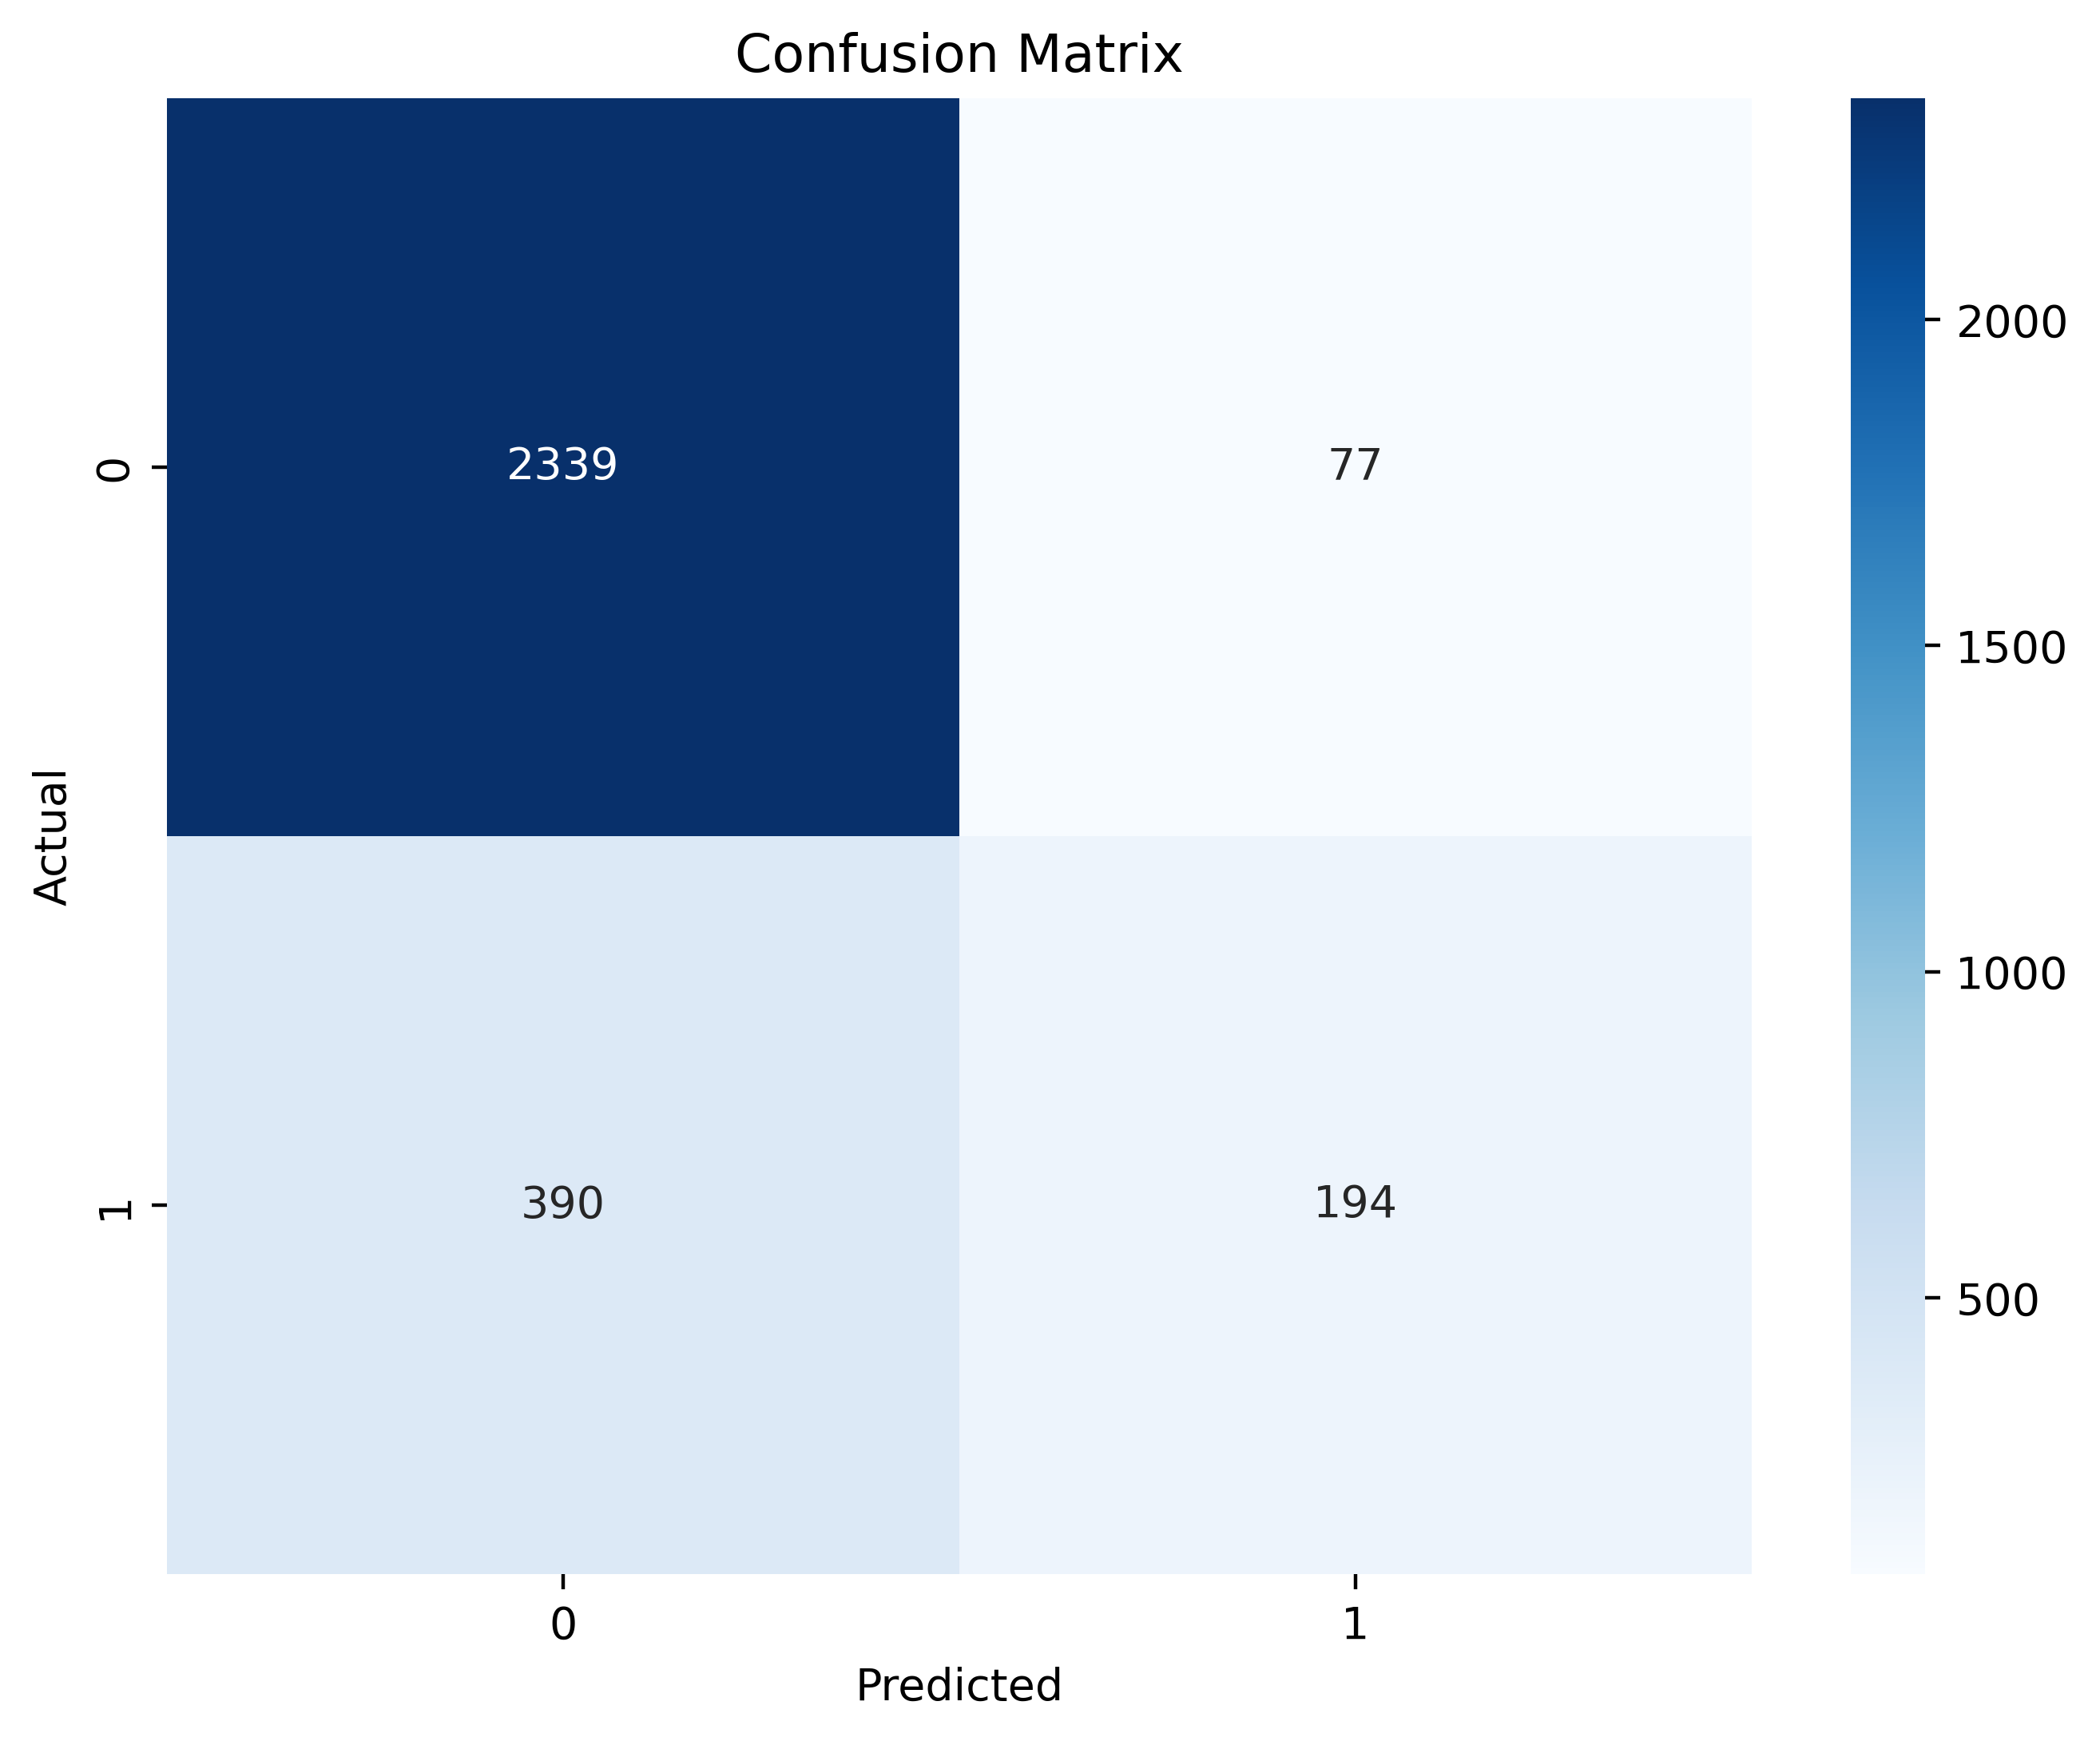

In [121]:
cm = confusion_matrix(y_test,grid_pred)

plt.figure(figsize=(8,6),dpi=400)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')

### SVM

In [122]:
from sklearn.svm import SVC

In [123]:
model = SVC()
model.fit(X_train,y_train)

SVC()

In [124]:
pred = model.predict(X_test)

In [125]:
g = accuracy_score(y_test,pred)
g

0.863